# Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import set_random_seed
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import pandas as pd
import cv2 as cv 
import cv2
import sys
import matplotlib.pyplot as plt
import skimage
import os
import re
from tqdm import tqdm
import numpy as np
from numpy.random import seed 
import random
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from keras import backend as k 
from keras import optimizers
from keras import applications
from keras import layers
from keras import models
from keras import callbacks
from keras import optimizers
from keras.backend import tensorflow_backend
from keras.preprocessing import image
from keras.utils.np_utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.applications import inception_v3
from keras.applications.inception_v3 import InceptionV3
from keras.applications import xception
from keras.applications import resnet50
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.utils import np_utils
from keras.regularizers import l2
from keras.preprocessing import image
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model 
from keras.layers import Activation
from keras.layers import merge, Input
from keras.layers import LeakyReLU
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.layers import Conv2D,Dropout,BatchNormalization,Dense,MaxPooling2D,ZeroPadding2D
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
img_width, img_height = 224, 224
from keras.applications.imagenet_utils import preprocess_input
import keras
from keras.models import Model
from keras.models import load_model
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2 as cv
from PIL import Image, ImageEnhance
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers , optimizers
from keras.layers import Input
from keras.applications import models
from keras.applications import VGG16
from keras.utils import np_utils
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.models import Sequential, Model 
import my_library as ml
from importlib import reload
from keras.optimizers import Adam
reload(ml)

Using TensorFlow backend.
W1121 00:48:36.431343  1124 deprecation_wrapper.py:119] From C:\Users\oshim\Documents\Dagm\my_library.py:6: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.



<module 'my_library' from 'C:\\Users\\oshim\\Documents\\Dagm\\my_library.py'>

In [2]:
import GPUtil
GPUtil.showUtilization()

| ID | GPU | MEM |
------------------
|  0 |  0% |  3% |


In [2]:
ml.train_test_val_generator(num=1)
#it will create train,test and val folder including 
# good and bad folder in each of them
# num = 1 means dataset 1 (Class1 and Class1_def)

Initialised with 50 image(s) found.
Output directory set to problem1/train/bad/output.

Processing <PIL.Image.Image image mode=L size=512x512 at 0x1749D756358>: 100%|██| 50/50 [00:00<00:00, 136.60 Samples/s]
Processing <PIL.Image.Image image mode=L size=512x512 at 0x1749D785278>: 100%|██| 50/50 [00:00<00:00, 135.50 Samples/s]
Processing <PIL.Image.Image image mode=L size=512x512 at 0x1749D7710B8>: 100%|██| 50/50 [00:00<00:00, 164.91 Samples/s]


Initialised with 50 image(s) found.
Output directory set to problem1/test/bad/output.

Processing <PIL.Image.Image image mode=L size=512x512 at 0x1749D778F28>: 100%|██| 50/50 [00:00<00:00, 146.59 Samples/s]
Processing <PIL.Image.Image image mode=L size=512x512 at 0x1749D771E10>: 100%|██| 50/50 [00:00<00:00, 150.55 Samples/s]
Processing <PIL.Image.Image image mode=L size=512x512 at 0x1749D761FD0>: 100%|██| 50/50 [00:00<00:00, 145.32 Samples/s]


Initialised with 50 image(s) found.
Output directory set to problem1/val/bad/output.

Processing <PIL.Image.Image image mode=L size=512x512 at 0x1749D761470>: 100%|██| 50/50 [00:00<00:00, 160.68 Samples/s]
Processing <PIL.Image.Image image mode=L size=512x512 at 0x1749D778B38>: 100%|██| 50/50 [00:00<00:00, 152.85 Samples/s]
Processing <PIL.Image.Image image mode=L size=512x512 at 0x1749D744128>: 100%|██| 50/50 [00:00<00:00, 156.18 Samples/s]


train_good image number:  334
train_bad image number:  200
test_good image number:  333
train_bad image number:  200
val_good image number:  332
val_bad image number:  200


### xTrain,xVal,xTest with out processing

In [2]:
def image_processing_function(img):
    edges = cv.Canny(img,50,100)
    return cv.merge((edges,edges,edges))
## this image processing function is actually useful only for class1 dataset.
## for every classes there are different image processing functions.
xTrain_,yTrain_,xVal_,yVal_,xTest_,yTest_ = ml.xTrain_xVal_xTest_from_train_test_val_folders(num=1,image_processing=False,size=224,
                                                                                      image_processing_function=image_processing_function)
# function name says it all. 
# by the way, it is worth mentioning that as total number of images is very
# small, I did not use any generator. 
# xTrain is a pure numpy array of shape (534, 224, 224, 3)
# xTrain,xVal,xTest are without any kind of image processing

### xTrain,xVal,xTest with processing

In [3]:
def image_processing_function(img):
    edges = cv.Canny(img,50,100)
    return cv.merge((edges,edges,edges))
## this image processing function is actually useful only for class1 dataset.
## for every classes there are different image processing functions.
xTrain,yTrain,xVal,yVal,xTest,yTest = ml.xTrain_xVal_xTest_from_train_test_val_folders(num=1,image_processing=True,size=224,
                                                                                      image_processing_function=image_processing_function)
# function name says it all. 
# by the way, it is worth mentioning that as total number of images is very
# small, I did not use any generator. 
# xTrain is a pure numpy array of shape (534, 224, 224, 3)
# xTrain,xVal,xTest are with image processing

# VGG16 with out Image Processing

In [4]:
image_input= Input(shape=(224,224,3))
model=VGG16(input_tensor=image_input, include_top=True, weights='imagenet')
last_layer = model.get_layer('flatten').output
last_layer = Dense(256, activation='relu',name='second_last')(last_layer)
last_layer = Dropout(.8,name='drop')(last_layer)
out = Dense(2, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
#custom_vgg_model.summary()

for layer in custom_vgg_model.layers[:-8]:
	layer.trainable = False
#custom_vgg_model.layers[-4].trainable
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='min')
checkpoint = ModelCheckpoint('class1_vgg_layers_8.hdf5', monitor='val_loss', save_best_only=True, mode='min')

batch_size = 32
custom_vgg_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])
hist = custom_vgg_model.fit(xTrain_, yTrain_, batch_size=batch_size, epochs=7, verbose=2, validation_data=(xVal_,yVal_),
                            callbacks=[early_stopping,checkpoint],class_weight='balanced') ;

W1121 00:14:16.393141 11856 deprecation_wrapper.py:119] From C:\Users\oshim\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1121 00:14:16.443818 11856 deprecation_wrapper.py:119] From C:\Users\oshim\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1121 00:14:16.458313 11856 deprecation_wrapper.py:119] From C:\Users\oshim\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1121 00:14:16.499046 11856 deprecation_wrapper.py:119] From C:\Users\oshim\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_

Train on 534 samples, validate on 532 samples
Epoch 1/7
 - 26s - loss: 0.9219 - acc: 0.5000 - val_loss: 0.6742 - val_acc: 0.6241
Epoch 2/7
 - 10s - loss: 0.6947 - acc: 0.6011 - val_loss: 0.6566 - val_acc: 0.6241
Epoch 3/7
 - 10s - loss: 0.6658 - acc: 0.6067 - val_loss: 0.6584 - val_acc: 0.6241
Epoch 4/7
 - 10s - loss: 0.6692 - acc: 0.6142 - val_loss: 0.6511 - val_acc: 0.6241
Epoch 5/7
 - 10s - loss: 0.6529 - acc: 0.6311 - val_loss: 0.6529 - val_acc: 0.6241
Epoch 6/7
 - 10s - loss: 0.6519 - acc: 0.6479 - val_loss: 0.6451 - val_acc: 0.6447
Epoch 7/7
 - 10s - loss: 0.6325 - acc: 0.6367 - val_loss: 0.6434 - val_acc: 0.6598


W1121 00:16:44.236085 11856 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.



Evaluation on Best Validation:

Confusion Matrix:
 [[ 86 114]
 [ 69 264]]

Confusion Matrix (as Percentage)


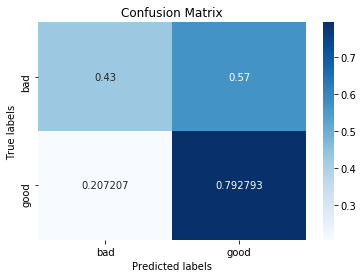

Bad data detection probability:  0.43
Good data detection probability: 0.7927927927927928
F1 score 0.7426160337552742


In [5]:
bestModel=load_model('class1_vgg_layers_8.hdf5')
#bestModel=load_model('class6_vgg_layers_8.hdf5')
print('\nEvaluation on Best Validation:')
#print('Accuracy: ',bestModel.evaluate(xTest_,yTest_)[1])

preds=bestModel.predict(xTest_)
predicted_class = []
for i in preds:
    if i[0]>i[1]:
        predicted_class.append(0)
    else:
        predicted_class.append(1)
f1,cm=ml.f1ScoreAndConfusionMatrix(ml.OneHotEncodeDecoder(yTest_),predicted_class)

*Obviously It will be better if I tune parameters. But I am more interested to see how it works in case of other models and in case of using image processing.*


# VGG16 with Image Processing

In [6]:
image_input= Input(shape=(224,224,3))
model=VGG16(input_tensor=image_input, include_top=True, weights='imagenet')
last_layer = model.get_layer('flatten').output
last_layer = Dense(256, activation='relu',name='second_last')(last_layer)
last_layer = Dropout(.8,name='drop')(last_layer)
out = Dense(2, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
#custom_vgg_model.summary()

for layer in custom_vgg_model.layers[:-8]:
	layer.trainable = False
#custom_vgg_model.layers[-4].trainable
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='min')
checkpoint = ModelCheckpoint('class1_vgg_layers_8.hdf5', monitor='val_loss', save_best_only=True, mode='min')

batch_size = 32
custom_vgg_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])
hist = custom_vgg_model.fit(xTrain, yTrain, batch_size=batch_size, epochs=7, verbose=2, validation_data=(xVal,yVal),
                            callbacks=[early_stopping,checkpoint],class_weight='balanced') ;

W1121 00:09:34.153430  5164 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 534 samples, validate on 532 samples
Epoch 1/7
 - 16s - loss: 0.7463 - acc: 0.6330 - val_loss: 0.2743 - val_acc: 0.9511
Epoch 2/7
 - 11s - loss: 0.1325 - acc: 0.9700 - val_loss: 0.0130 - val_acc: 1.0000
Epoch 3/7
 - 11s - loss: 0.0140 - acc: 1.0000 - val_loss: 9.8334e-04 - val_acc: 1.0000
Epoch 4/7
 - 12s - loss: 0.0034 - acc: 1.0000 - val_loss: 1.6780e-04 - val_acc: 1.0000
Epoch 5/7
 - 11s - loss: 9.1343e-04 - acc: 1.0000 - val_loss: 2.2173e-05 - val_acc: 1.0000
Epoch 6/7
 - 12s - loss: 4.0299e-04 - acc: 1.0000 - val_loss: 8.6124e-06 - val_acc: 1.0000
Epoch 7/7
 - 12s - loss: 6.0808e-04 - acc: 1.0000 - val_loss: 3.1922e-06 - val_acc: 1.0000


W1121 00:12:33.075455  5164 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.



Evaluation on Best Validation:

Confusion Matrix:
 [[200   0]
 [  0 333]]

Confusion Matrix (as Percentage)


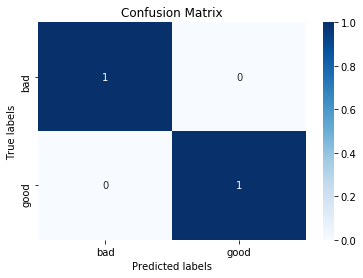

Bad data detection probability:  1.0
Good data detection probability: 1.0
F1 score 1.0


In [7]:
bestModel=load_model('class1_vgg_layers_8.hdf5')
#bestModel=load_model('class6_vgg_layers_8.hdf5')
print('\nEvaluation on Best Validation:')
#print('Accuracy: ',bestModel.evaluate(xTest_,yTest_)[1])

preds=bestModel.predict(xTest)
predicted_class = []
for i in preds:
    if i[0]>i[1]:
        predicted_class.append(0)
    else:
        predicted_class.append(1)
f1,cm=ml.f1ScoreAndConfusionMatrix(ml.OneHotEncodeDecoder(yTest),predicted_class)

# Xception without Image Processing

In [4]:
conv_base = xception.Xception(weights='imagenet',
                  include_top=False,
                  input_shape=(224,224, 3))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))
xTrain = xTrain/255
xVal = xVal/255
xTest = xTest/255

#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=0, mode='min')
checkpoint = ModelCheckpoint('class1_p.hdf5', monitor='val_loss', save_best_only=True, mode='min')

batch_size = 8
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
hist_processed = model.fit(xTrain_, yTrain_, batch_size=batch_size, epochs=7, verbose=2, validation_data=(xVal_,yVal_),
                            callbacks=[early_stopping,checkpoint])

W1121 00:25:47.392513 10428 deprecation_wrapper.py:119] From C:\Users\oshim\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1121 00:25:47.444449 10428 deprecation_wrapper.py:119] From C:\Users\oshim\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1121 00:25:47.460612 10428 deprecation_wrapper.py:119] From C:\Users\oshim\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1121 00:25:47.498578 10428 deprecation_wrapper.py:119] From C:\Users\oshim\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.

Train on 534 samples, validate on 532 samples
Epoch 1/7
 - 47s - loss: 1.7746 - acc: 0.6142 - val_loss: 0.8293 - val_acc: 0.6447
Epoch 2/7
 - 29s - loss: 0.6876 - acc: 0.6442 - val_loss: 8.4654 - val_acc: 0.4680
Epoch 3/7
 - 28s - loss: 0.5925 - acc: 0.8352 - val_loss: 0.4179 - val_acc: 0.9774
Epoch 4/7
 - 28s - loss: 0.2730 - acc: 0.9644 - val_loss: 0.2319 - val_acc: 0.9774
Epoch 5/7
 - 29s - loss: 0.4012 - acc: 0.9532 - val_loss: 1.5089 - val_acc: 0.8778
Epoch 6/7
 - 28s - loss: 0.1477 - acc: 0.9850 - val_loss: 0.1465 - val_acc: 0.9643
Epoch 7/7
 - 28s - loss: 0.2396 - acc: 0.9757 - val_loss: 0.5241 - val_acc: 0.9568


In [4]:
conv_base = xception.Xception(weights='imagenet',
                  include_top=False,
                  input_shape=(224,224, 3))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))
xTrain = xTrain/255
xVal = xVal/255
xTest = xTest/255

#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=0, mode='min')
checkpoint = ModelCheckpoint('xception_with_processing.hdf5', monitor='val_loss', save_best_only=True, mode='min')

batch_size = 8
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
hist_processed = model.fit(xTrain, yTrain, batch_size=batch_size, epochs=7, verbose=2, validation_data=(xVal,yVal),
                            callbacks=[early_stopping,checkpoint])

W1121 00:49:13.245835  1124 deprecation_wrapper.py:119] From C:\Users\oshim\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1121 00:49:13.346047  1124 deprecation_wrapper.py:119] From C:\Users\oshim\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1121 00:49:13.382099  1124 deprecation_wrapper.py:119] From C:\Users\oshim\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1121 00:49:13.433672  1124 deprecation_wrapper.py:119] From C:\Users\oshim\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.

Train on 534 samples, validate on 532 samples
Epoch 1/7
 - 44s - loss: 1.8170 - acc: 0.6217 - val_loss: 6.0309 - val_acc: 0.6241
Epoch 2/7
 - 29s - loss: 0.2490 - acc: 0.9551 - val_loss: 10.0587 - val_acc: 0.3759
Epoch 3/7
 - 29s - loss: 0.5517 - acc: 0.9457 - val_loss: 10.0587 - val_acc: 0.3759
Epoch 4/7
 - 29s - loss: 0.0904 - acc: 0.9925 - val_loss: 2.1957 - val_acc: 0.7350
Epoch 5/7
 - 29s - loss: 0.2947 - acc: 0.9644 - val_loss: 10.0587 - val_acc: 0.3759
Epoch 6/7
 - 29s - loss: 0.3368 - acc: 0.9682 - val_loss: 0.3878 - val_acc: 0.9643
Epoch 7/7
 - 29s - loss: 0.2693 - acc: 0.9700 - val_loss: 1.0949 - val_acc: 0.7989


*something is definitely wrong. I will find out later*